## 얼굴검출

https://docs.opencv.org/master/db/d28/tutorial_cascade_classifier.html

- 2001년에 비올라(P. Viola)와 존스(M. Jones)가 발표한 부스팅(boosting) 기반의 캐스케이드 분류기(cascade classifier) 알고리즘을 기반 으로 만들어진 얼굴검출기 제공
- 비올라-존스 얼굴 검출 알고리즘은 기본적으로 영상을 24×24 크기로 정규화한 후, 유사-하르 필터(Haar-like filter) 집합으로부터 특징 정보를 추출하여 얼굴 여부를 판별
- 유사-하르 필터란 흑백 사각형이 서로 붙어 있는 형태로 구성된 필터이며, 24×24 영상에서 만들 수 있는 유사-하르 필터의 예
- 사람의 정면 얼굴 형태가 전형적으로 밝은 영역(이마, 미간, 볼 등)과 어두운 영역(눈썹, 입술 등)이 정해져 있기 때문에 유사-하르 필터로 구한 특징 값은 얼굴을 판별하는 용도로 사용


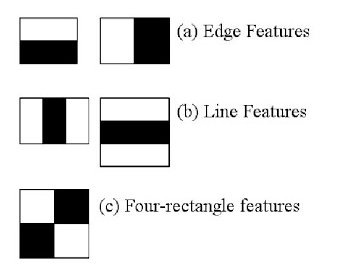


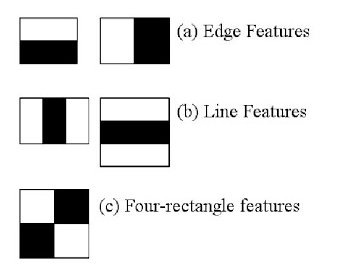

### OpenCV는 사전학습된 얼굴 검출, 눈 검출 등을 위한 분류기 XML 파일을 제공  

사전 학습된 분류기 XML 파일은 %OPENCV_DIR%\etc\haarcascades 폴더에서 검색가능


In [16]:
import numpy as np
import cv2
import sys

In [19]:
def detect_face(src):
    classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    if classifier.empty():
        print('XML load failed!')
        sys.exit()

    faces = classifier.detectMultiScale(src)

    for (x, y, w, h) in faces:
        cv2.rectangle(src, (x, y), (x + w, y + h), (255, 0, 255), 2)

    cv2.imshow('src', src)
    cv2.waitKey()
    cv2.destroyAllWindows()


def detect_eyes(src):

    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

    if face_classifier.empty() or eye_classifier.empty():
        print('XML load failed!')
        sys.exit()

    faces = face_classifier.detectMultiScale(src)

    for (x1, y1, w1, h1) in faces:
        cv2.rectangle(src, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 255), 2)

        faceROI = src[y1:y1 + h1, x1:x1 + w1]
        eyes = eye_classifier.detectMultiScale(faceROI)

        for (x2, y2, w2, h2) in eyes:
            center = (int(x2 + w2 / 2), int(y2 + h2 / 2))
            cv2.circle(faceROI, center, int(w2 / 2), (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('src', src)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('images/bp.jpg')
if src is None:
        print('Image load failed!')
        sys.exit()
#얼굴 검출
detect_face(src)
#눈 검출
detect_eyes(src)